<a href="https://colab.research.google.com/github/StefanoSassy/Introduccion-al-Maching-Learning-/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maching Learning

## Regresión lineal.

Empecemos con un ejemplo de en que tipo de casos aplicar regresión lineal. Vamos a descargar una base de datos sobre el precio de las viviendas en Boston (2022).

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston" #Página donde estamos extrayendo los datos.
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Convertir a formato adecuado
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Crear un DataFrame
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
df = pd.DataFrame(data, columns=column_names)
df["MEDV"] = target #Esto es un ejemplo de como agregar una columna en el data frame.
print(df) #La base de datos entera.
print(df.columns) #Información resumida por las columnas.


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

La idea es encontrar los datos que están más relacionados con respecto al precio de las casas, visualizar dichas relaciones, aplicar regresión lineal (después de visualizar) para predecir los precios futuros que mejor se ajustan a los datos. Para ello empezamos usando la descripción de los datos.

In [ ]:
boston_descr = """
Boston Housing Dataset:
Este dataset contiene información sobre viviendas en Boston y fue recopilado por el U.S. Census Service en 1978.
El objetivo original era estudiar el impacto de la contaminación en los precios de las viviendas.

Características:
1. CRIM: Tasa de criminalidad per cápita por ciudad.
2. ZN: Proporción de terrenos residenciales para lotes grandes.
3. INDUS: Proporción de acres comerciales no minoristas por ciudad.
4. CHAS: Variable ficticia de Charles River (1 si está cerca del río, 0 si no).
5. NOX: Concentración de óxidos de nitrógeno (ppm).
6. RM: Número promedio de habitaciones por vivienda.
7. AGE: Proporción de viviendas ocupadas por propietarios construidas antes de 1940.
8. DIS: Distancia ponderada a cinco centros de empleo en Boston.
9. RAD: Índice de accesibilidad a autopistas radiales.
10. TAX: Tasa del impuesto a la propiedad por cada \$10,000.
11. PTRATIO: Relación alumno-profesor por ciudad.
12. B: 1000(Bk - 0.63)^2, donde Bk es la proporción de residentes afroamericanos por ciudad.
13. LSTAT: % de la población con bajos ingresos.
14. MEDV: Valor medio de las viviendas ocupadas por sus dueños en \$1000.

Fuente: http://lib.stat.cmu.edu/datasets/boston
"""

In [ ]:
target = df["MEDV"].values  # Convertir con NumPy en array (matriz). Nuestro objetivo a analizar es el precio.
print(target)


[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

Checamos que los datos estén "limpios".

In [ ]:
df.info() #Checar el tipo de dato y si la tabla no tiene valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Matriz de covarianzas.

La matriz de covarianzas nos dice como están relacionados los datos linealmente y suponiendo que las variables aleatorias respetan una distribución normal. El cálculo es el siguiente: supongamos que tenemos tres variables $X_1$, $X_2$ y $X_3$ con cinco observaciones cada una:

\begin{array}{|c|c|c|c|}
\hline
\text{Observación} & X_1 & X_2 & X_3 \\
\hline
1 & 2 & 3 & 10 \\
2 & 4 & 5 & 7 \\
3 & 6 & 2 & 6 \\
4 & 8 & 8 & 5 \\
5 & 10 & 7 & 2 \\
\hline
\end{array}

Calculamos las medias de cada variable con la siguiente fórmula

$$\mu_{X_i}=\frac{1}{n}\sum_{k=1}^n X^{(k)}_i.$$

\begin{array}{lccl}
         \mu_{X_1} =& \frac{1}{5}(2+4+6+8+10) = 6, &  \\
         \mu_{X_2} =& \frac{1}{5}(3+5+2+8+7) =  5,&  \\
         \mu_{X_3} =& \frac{1}{5}(10+7+6+5+2) = 6. & \\
      \end{array}

Ahora calculamos las desviaciones estandar con la fórmula:
$$
\sigma_{X_i} = \sqrt{\frac{1}{n} \sum_{k=1}^{n} \left( X_i^{(k)} - \mu_{X_i} \right)^2}.
$$

\begin{array}{lccl}
         \sigma_{X_1} =& \sqrt{\frac{1}{5}(16+4+0+4+16)} = \sqrt{8}, &  \\
         \sigma_{X_2} =& \sqrt{\frac{1}{5}(4+0+9+9+4)} =  \sqrt{26/5}, &  \\
         \sigma_{X_3} =& \sqrt{\frac{1}{5}(16+1+0+1+16)} = \sqrt{34/5}. & \\
      \end{array}
Calculamos las covarianzas con la fórmula:
$$
\text{cov}(X_\alpha,X_\beta)=\frac{1}{n}\sum(X_\alpha^{(k)}-\mu_{X_\alpha})(X_\beta^{(k)}-\mu_{X_\beta}).
$$

\begin{array}{lccl}
         \text{cov}(X_1,X_2) =& \frac{22}{5}, &  \\
         \text{cov}(X_1,X_3) =& \frac{-36}{5}, &  \\
         \text{cov}(X_2,X_3) =& \frac{-19}{5}. & \\
      \end{array}
Calculamos los coeficientes de correlación:
$$r_{ij}=\frac{\text{cov}(X_i,X_j)}{\sigma_{X_i}\sigma_{X_j}}.$$

\begin{array}{lccl}
         r_{12} \approx & 0.683, &  \\
         r_{13} \approx & -0.976, &  \\
         r_{23} \approx & -0.639. & \\
      \end{array}
Finalmente acomodamos todo en la matriz de covarianzas, que está dada por
$$R =
\begin{bmatrix}
1 & r_{12} & r_{13} \\
r_{21} & 1 & r_{23} \\
r_{31} & r_{32} & 1
\end{bmatrix}=\begin{bmatrix}
1 & 0.683 & -0.976 \\
0.683 & 1 & -0.639\\
-0.976 & -0.639 & 1.
\end{bmatrix}$$

Todas estás cuentas las hará el código Python, y finalmente usaremos la libreria mathplot.

In [ ]:
corr = df.corr() #Este código simple encuentra la matriz de covarianzas o matriz de correlaciones.
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

Veamos un *mapa de color* de la matriz.  

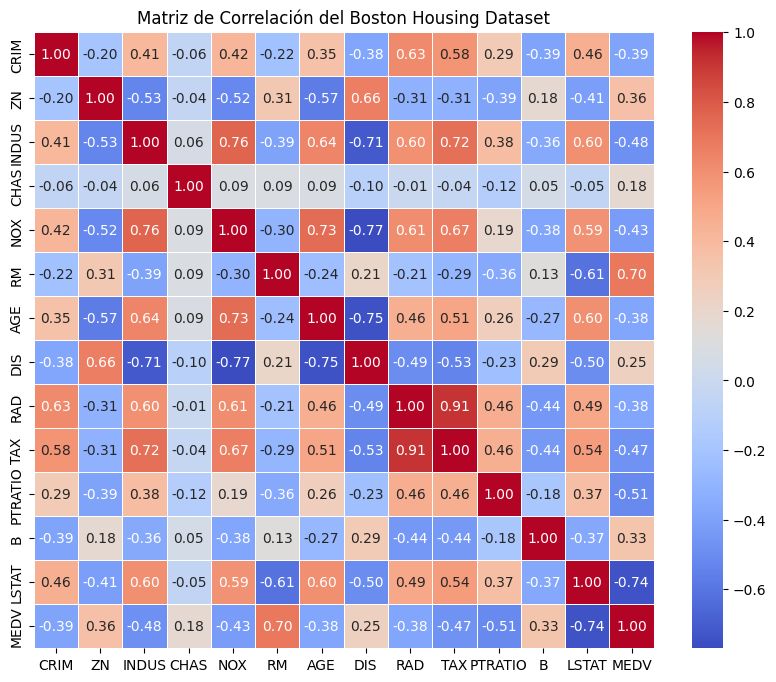

In [ ]:
import seaborn as sns #Esta libreria sirve para dar color al mapa de calor.

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación del Boston Housing Dataset")
plt.show()

El siguiente código muestra:
1.   cuales son los nombres de las columnas más relacionadas con el precio de la vivienda,
2.   cuales son los valores mas grandes (en valor absoluto) más grandes que encontra al generar la matriz de covarainzas.



In [ ]:
print(df.corr().abs().nlargest(3, 'MEDV').index)
print(df.corr().abs().nlargest(3, 'MEDV').values[:,13])

Index(['MEDV', 'LSTAT', 'RM'], dtype='object')
[1.         0.73766273 0.69535995]


La siguiente gráfica muestra los puntos $(x,y)$ done $x$ es el valor LSTAT: % de la población con bajos ingresos y $y$ el precio de las viviendas MEDV.

Text(0, 0.5, 'MEDV')

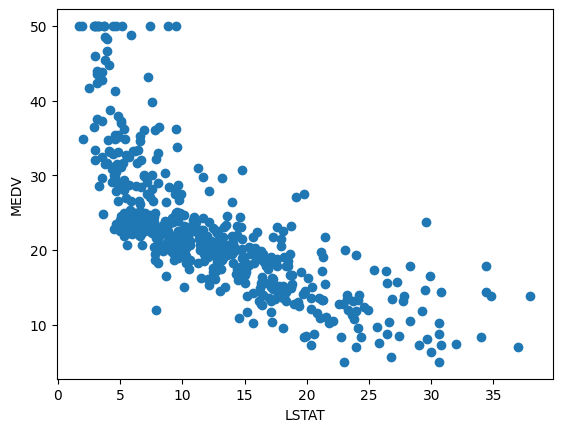

In [ ]:
plt.scatter(df['LSTAT'], df['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

La siguiente gráfica muestra los puntos  (x,y)  done  x  es el valor RM: Número promedio de habitaciones por vivienda y $y$  el precio de las viviendas MEDV.

Text(0, 0.5, 'MEDV')

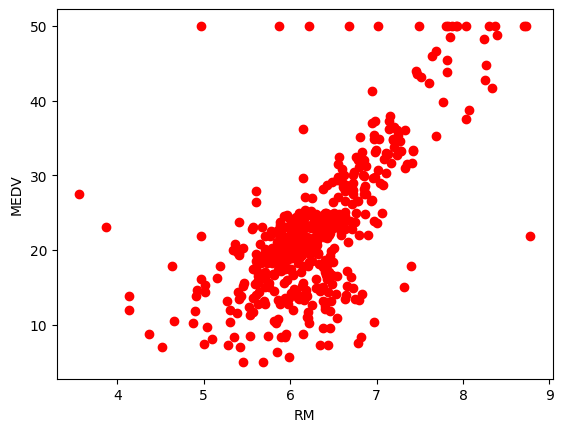

In [ ]:
plt.scatter(df['RM'], df['MEDV'], marker='o', c='red')
plt.xlabel('RM')
plt.ylabel('MEDV')

La siguiente gráfica muestra los puntos (x,y) done x es el valor  LSTAT, $y$ el valor RM y $z$ MEDV.

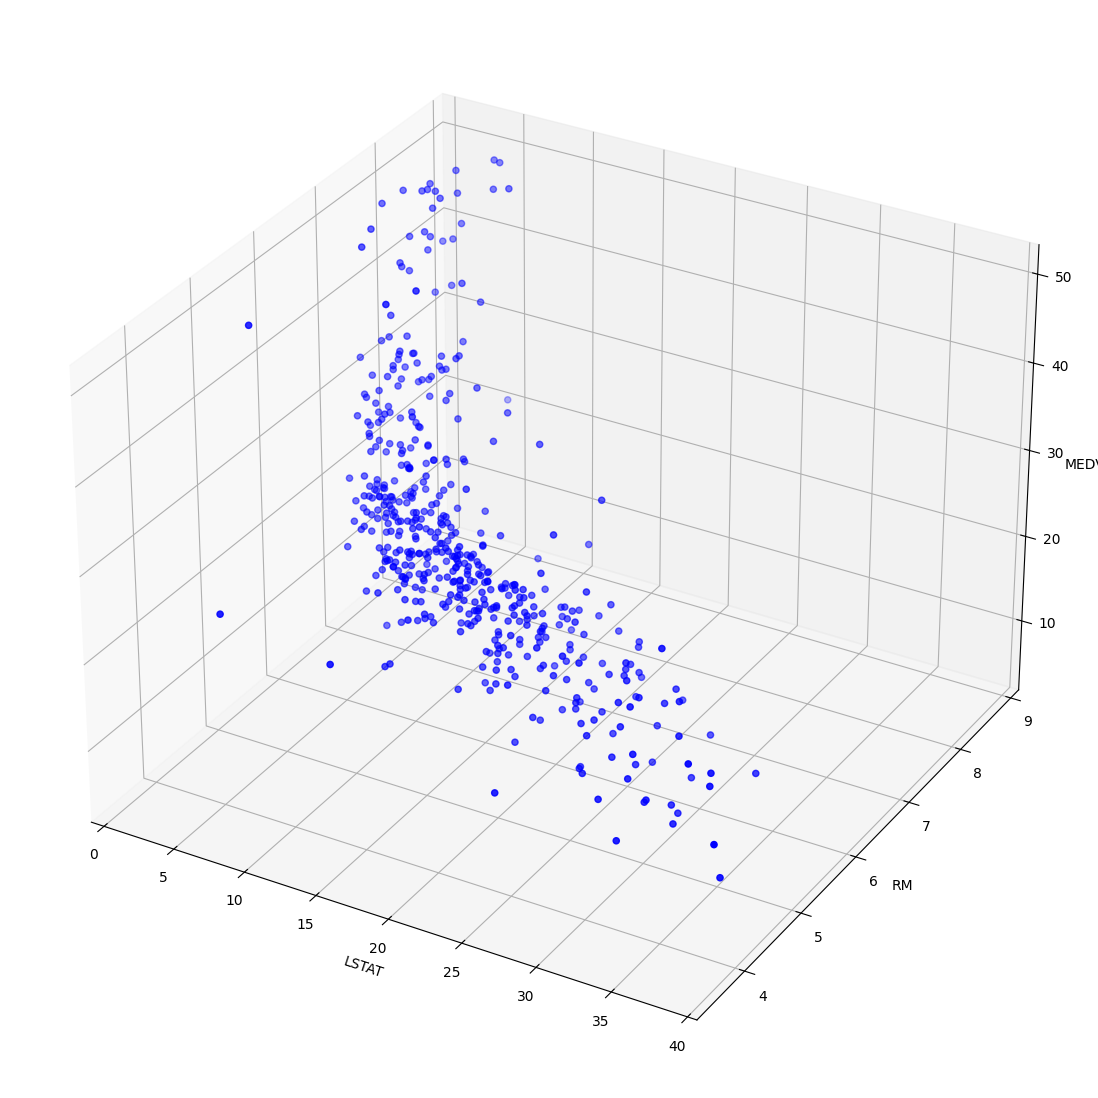

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['LSTAT'],
df['RM'],
df['MEDV'],
c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()

#Método de mínimos cuadrados

Supongamos que tenemos una cantidad $m$ de datos $(x_1,y_y),\dots, (x_m,y_m)$ acomodados como en cualquiera de las gráficas anteriores. Nos gustaría encontrar un polinomio que aproxime a los valor de los puntos para predecir el siguiente valor del experimento.

Empezamos con una recta $y=mx+b$ (polinomio de grado 1) ¿Cómo se elige la recta correcta o la mejor recta que aproxima dichos datos? Si minimizamos la distancia de los puntos a nuestra recta podemos minimizar el "error".

Empecemos con la distancia de dos puntos en el plano $P=(x_1,y_1)$ y $Q=(x_2,y_2)$, que está dada por la fórmula:
$$ d(P,Q)=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}.$$

En este caso, si el punto $P$ esta sobre la recta que queremos calcular, entonces tiene por coordenadas $P=(x,cx+d)$, así, cada una de las distancias que queremos calcular están dados por las distancias

$$d_i(P,Q)=\sqrt{(x_i-x_i)^2+(y_i-(mx_i+b))^2}=\sqrt{(y_i-(mx_i+b))^2}=|(y_i-(mx_i+b))|,$$

$$d^2_i(P,Q)=(y_i-(mx_i+b))^2.$$

Recordemos que los valores $x_i$ y $y_i$ los conocemos, es decir, nuestras incognitas son $m$, $b$.

El método de mínimos cuadrados busca minimizar el "error"
$$E=\sum_{i=1}^md_i^2=\sum_{i=1}^m(y_i-mx_i-b)^2.$$

Para aproximar los datos por una parábola basta tomar $y=ax^2+bx+c$ y el error se ve como:
$$ E=\sum_{i=1}^m(y_i-ax_i^2-bx_i-c)^2.$$

Para aproximar los datos para cualquier polinomio tendríamos que
$$E=\sum_{i=1}^m(y_i-a_nx^n_i-a_{n-1}x^{n-1}_i-\cdots-a_2x^2_i-a_1x_i-a_0)^2$$

Independientemente de los coeficientes que buscamos minimizar, la función $E:\mathbb{R}^n\rightarrow \mathbb{R}^{+}\cup \{0\}$ siempre es positiva y diferenciable, lo que nos permite calcular los mínimos de una función de este estilo usando el determinante de la matriz hessiana para buscar los ceros de dicho determinante:
$$
H(E) = \begin{pmatrix}
\frac{\partial^2 E}{\partial a_n^2} & \frac{\partial^2 E}{\partial a_n \partial a_{n-1}} & \cdots & \frac{\partial^2 E}{\partial a_n \partial a_0} \\
\frac{\partial^2 E}{\partial a_{n-1} \partial a_n} & \frac{\partial^2 E}{\partial a_{n-1}^2} & \cdots & \frac{\partial^2 E}{\partial a_{n-1} \partial a_0} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 E}{\partial a_0 \partial a_n} & \frac{\partial^2 E}{\partial a_0 \partial a_{n-1}} & \cdots & \frac{\partial^2 E}{\partial a_0^2}
\end{pmatrix}_{(n+1)\times (n+1)}
$$

Afortunadamente, el álgebra lineal nos ayuda a mejorar el procedimiento, redefiniendo a $E=||y-Ax||^2$ donde:
$$A =\begin{pmatrix}
x_1^n & x_1^{n-1} & \cdots & x_1 & 1\\
x_2^n & x_2^{n-1} & \cdots & x_2 & 1\\
\vdots & \vdots & \ddots & \vdots  & \vdots\\
x_m^n & x_m^{n-1} & \cdots & x_m & 1
\end{pmatrix}_{m\times (n+1)} \quad y=\begin{pmatrix}y_1 \\ y_2 \\ \vdots \\ y_m \end{pmatrix}_{m\times 1}
\quad \text{y} \quad x = \begin{pmatrix}a_n \\ a_{n-1}\\ \vdots \\ a_1 \\ a_0 \end{pmatrix}_{(n+1)\times 1}$$
Además del siguiente teorema:

**Teorema.-** Sean $A_{m \times {(n+1)}}$ y $y\in \mathbb{R}^m$. Entonces exite $x_0 \in \mathbb{R^{n+1}}$ tal que
$$(A^*A)x_0=A^*y \quad \text{y} \quad ||y-Ax_0||\leq||y-Ax||\;\; \forall x \in \mathbb{R}^{n+1}.$$
Más aun, si $\text{rang}(A)=n+1 \Rightarrow x_0=(A^*A)^{-1}A^*y.$

**Nota** En este caso, aunque se esta usando la matriz adjunta $A^*$, como nuestras matrices de datos tiene entradas reales, resulta que $A^*=A^t$ la transpuesta. Esto quiere decir que gracias a los ejemplos que ya vimos de como calcular la matriz transpuesta, multiplicación de matrices y el algoritmo de Gauss-Jordan, podríamos generar un código para entrenar al programa y realizar regresión lineal.  


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


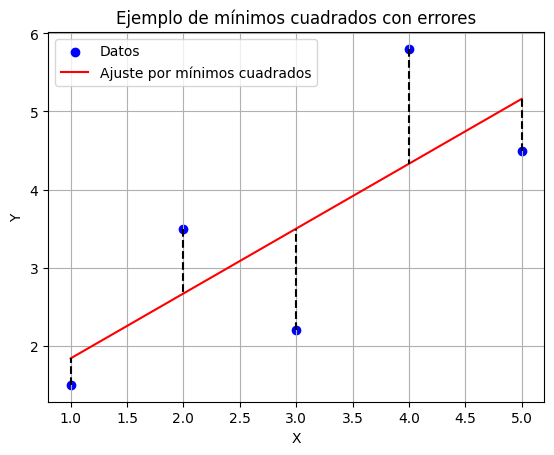

In [ ]:
from google.colab import drive #Este código es un ejemplo de como conectarse a google Drive e insertar una imagen.
drive.mount('/content/drive')

from IPython.display import Image
Image(filename='/content/drive/My Drive/Colab Notebooks/mc.png')

Antes de continuar veamos un ejemplo de las cuentas a realizar y como nos ayuda el teorema.